# Student Activity: Returns Over Date Ranges

Harold's manager wants him to analyze the last 4 years of historical price data for Shopify, and then plot the daily returns over the last 1-, 2-, 3-, and 4-year periods. His manager wants to see the differences in average daily returns for each time period to determine whether a short- or long-term perspective should be used in prospecting Shopify as a potential investment opportunity.

Use the following instructions to help Harold analyze the last 4 years of Shopify stock data.

## Instructions

In [11]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path

%matplotlib inline

### Read CSV in as DataFrame

In [12]:
# Set the path
file_path = Path("../shopify_stock_data.csv")

# Read in the CSV as a DataFrame
shopify_csv = pd.read_csv(file_path)
shopify_csv.head()

,date,close,volume,open,high,low
0,5/21/2015 16:00:00,31.25,211058,35.03,35.03,30.00
1,5/22/2015 16:00:00,34.94,224174,32.32,38.00,32.00
2,5/25/2015 16:00:00,37.26,105460,35.00,37.47,35.00
3,5/26/2015 16:00:00,36.92,75935,37.26,37.69,36.30
4,5/27/2015 16:00:00,34.50,135778,38.00,38.16,33.63


### View Summary Statistics

In [13]:
# Output summary statistics for csv data
shopify_csv.describe()

,close,volume,open,high,low
count,1155.000000,1.155000e+03,1155.000000,1155.000000,1155.000000
mean,158.939030,2.447068e+05,158.782268,161.897212,155.624459
std,131.610276,3.170294e+05,131.419657,133.989183,128.882484
min,26.810000,4.341000e+03,27.030000,27.380000,25.850000
25%,47.220000,7.211100e+04,47.465000,48.730000,45.465000
50%,127.110000,2.031930e+05,126.940000,129.310000,123.750000
75%,203.415000,3.230220e+05,205.050000,209.340000,200.000000
max,541.490000,5.829405e+06,540.620000,544.000000,529.500000


### Drop Extra Columns

In [14]:
# Drop unnecessary columns
shopify_csv = shopify_csv.drop(columns=["volume", "open", "high", "low"])
shopify_csv.head()

,date,close
0,5/21/2015 16:00:00,31.25
1,5/22/2015 16:00:00,34.94
2,5/25/2015 16:00:00,37.26
3,5/26/2015 16:00:00,36.92
4,5/27/2015 16:00:00,34.50


### Set Date as Index

In [15]:
# Set the date as the index to the DataFrame
shopify_csv = shopify_csv.set_index(pd.to_datetime(shopify_csv["date"], infer_datetime_format=True))
display(type(shopify_csv.index))
shopify_csv.head()

pandas.core.indexes.datetimes.DatetimeIndex

,date,close
date,,
2015-05-21 16:00:00,5/21/2015 16:00:00,31.25
2015-05-22 16:00:00,5/22/2015 16:00:00,34.94
2015-05-25 16:00:00,5/25/2015 16:00:00,37.26
2015-05-26 16:00:00,5/26/2015 16:00:00,36.92
2015-05-27 16:00:00,5/27/2015 16:00:00,34.50


### Drop Extra Date Column

In [16]:
# Drop the extra date column
shopify_csv = shopify_csv.drop(columns=["date"])
shopify_csv.head()

,close
date,
2015-05-21 16:00:00,31.25
2015-05-22 16:00:00,34.94
2015-05-25 16:00:00,37.26
2015-05-26 16:00:00,36.92
2015-05-27 16:00:00,34.50


### Calculate Daily Returns

In [17]:
# Calculate the daily returns over the last 4 years
daily_return = shopify_csv.pct_change()
daily_return.head()

,close
date,
2015-05-21 16:00:00,NaN
2015-05-22 16:00:00,0.118080
2015-05-25 16:00:00,0.066400
2015-05-26 16:00:00,-0.009125
2015-05-27 16:00:00,-0.065547


### Use Indexing to Create Date Ranges

In [18]:
# Slice DataFrame into 1 year timeframe
daily_return_1_year = daily_return.loc["2018-12-30":"2019-12-31"]
daily_return_1_year

,close
date,
2018-12-31 16:00:00,0.037194
2019-01-02 16:00:00,-0.008899
2019-01-03 16:00:00,-0.065202
2019-01-04 16:00:00,0.057572
2019-01-07 16:00:00,0.037464
...,...
2019-12-20 16:00:00,-0.005503
2019-12-23 16:00:00,-0.003118
2019-12-24 13:30:00,0.026915


In [19]:
# Slice DataFrame into 2 year timeframe
daily_return_2_year = daily_return.loc["2017-12-30":"2019-12-31"]
daily_return_2_year

,close
date,
2018-01-02 16:00:00,0.038943
2018-01-03 16:00:00,0.023398
2018-01-04 16:00:00,0.017092
2018-01-05 16:00:00,-0.001455
2018-01-08 16:00:00,0.016392
...,...
2019-12-20 16:00:00,-0.005503
2019-12-23 16:00:00,-0.003118
2019-12-24 13:30:00,0.026915


In [20]:
# Slice DataFrame into 3 year timeframe
daily_return_3_year = daily_return.loc["2016-12-30":"2019-12-31"]
daily_return_3_year

,close
date,
2016-12-30 16:00:00,-0.008250
2017-01-03 16:00:00,-0.000867
2017-01-04 16:00:00,0.020989
2017-01-05 16:00:00,0.073055
2017-01-06 16:00:00,-0.017891
...,...
2019-12-20 16:00:00,-0.005503
2019-12-23 16:00:00,-0.003118
2019-12-24 13:30:00,0.026915


In [21]:
# Slice DataFrame into 4 year timeframe
daily_return_4_year = daily_return.loc["2015-12-30":"2019-12-31"]
daily_return_4_year

,close
date,
2015-12-30 16:00:00,0.037069
2015-12-31 16:00:00,-0.013577
2016-01-04 16:00:00,0.008989
2016-01-05 16:00:00,-0.013085
2016-01-06 16:00:00,0.004513
...,...
2019-12-20 16:00:00,-0.005503
2019-12-23 16:00:00,-0.003118
2019-12-24 13:30:00,0.026915


### Output Summary Statistics for 1 Year of Daily Returns 

In [22]:
# Display summary statistics for 1 year of Shopify stock data
daily_return_1_year.describe()

,close
count,251.000000
mean,0.004532
std,0.026819
min,-0.089871
25%,-0.009309
50%,0.005486
75%,0.019334
max,0.087916


### Output Summary Statistics for 2 Years of Daily Returns 

In [23]:
# Display summary statistics for 2 years of Shopify stock data
daily_return_2_year.describe()

,close
count,501.000000
mean,0.003282
std,0.030797
min,-0.127650
25%,-0.012777
50%,0.005486
75%,0.019707
max,0.121339


### Output Summary Statistics for 3 Years of Daily Returns

In [24]:
# Display summary statistics for 3 years of Shopify stock data
daily_return_3_year.describe()

,close
count,752.000000
mean,0.003355
std,0.029765
min,-0.127650
25%,-0.012091
50%,0.005037
75%,0.020025
max,0.136827


### Output Summary Statistics for 4 Years of Daily Returns

In [25]:
# Display summary statistics for 4 years of Shopify stock data
daily_return_4_year.describe()

,close
count,1003.000000
mean,0.003124
std,0.029286
min,-0.127650
25%,-0.012419
50%,0.004376
75%,0.019414
max,0.136827


### Plot 1 Year of Daily Returns 

<AxesSubplot:xlabel='date'>

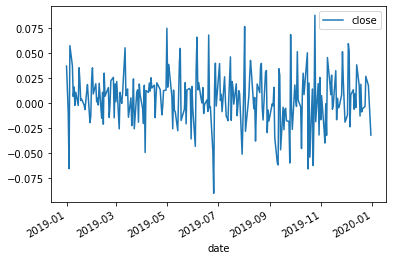

In [29]:
# Display chart of 1 year's worth of daily Shopify returns
daily_return_1_year.plot()

### Plot 2 Years of Daily Returns

<AxesSubplot:xlabel='date'>

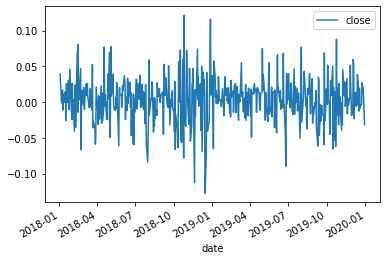

In [28]:
# Display chart of 2 year's worth of daily Shopify returns
daily_return_2_year.plot()

### Plot 3 Years of Daily Returns

In [34]:
# Display chart of 3 year's worth of daily Shopify returns
# daily_return_3_year.plot()
daily_return_3_year.shape


(752, 1)

### Plot 4 Years of Daily Returns

<AxesSubplot:xlabel='date'>

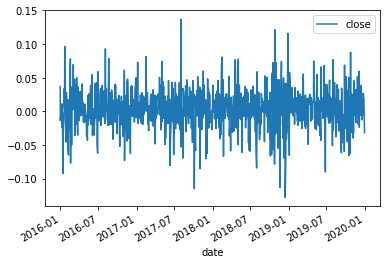

In [31]:
# Display chart of 4 year's worth of daily Shopify returns
daily_return_4_year.plot()

### Analyze Daily Returns over Date Ranges

1. What are the average daily returns over each date range?

    * 1 Year = 0.004532 or 4.53%
    * 2 Year = 0.003282 or 3.28%
    * 3 Year = 0.003355 or 3.35%
    * 4 Year = 0.003124 or 3.12%
    
    
2. What insights could this provide in regards to wanting to trade Shopify stock in the long-term vs. short-term? 

    Based on the varying distributions of daily returns over 1 Year, 2 Year, 3 Year, and 4 Year periods, it would appear as though trading Shopify in the short-term would more be profitable.